In [1]:
# instalar tensorflow con pip install tensorflow desde terminar anaconda prompt

In [2]:
#import lliberias

import tensorflow as tf
from tensorflow import keras
import numpy as np
# ver verson tensorFlow
tf.__version__

'2.10.0'

In [3]:
#descargamos 
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()

## Analisis de les dades

In [4]:
# revisien la forma y tipo de los datos
print(x_train.shape)# 60000 imagenes o numeros de 28x28 cada una
print(x_train.dtype)# entero sin signos 8 bits

(60000, 28, 28)
uint8


In [5]:
# mostrem les dades d'una imatge
print(x_train[88])

#ostramos la salida
print(y_train[69])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   8  76 202 254 255 163  37   2
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  13 182 253 253 253 253 253 253  23
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  15 179 253 253 212  91 218 253 253 179
  109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 105 253 253 160  35 156 253 253 253 253
  250 113   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  19 212 253 253  88 121 253 233 12

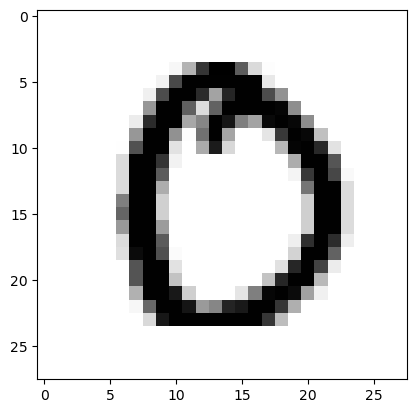

In [6]:
# ver la imagen 

import matplotlib.pyplot as plt
plt.imshow(x_train[88],cmap = plt.cm.binary)

## Pre-processament de les dades

In [7]:
# convertir el tipo unit8 a float32 per tener representacio amb decimals

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_train.dtype

#normalitzacion
x_train = x_train / 255
x_test  = x_test / 255


#observem el resultat

print(x_train[88])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
# Convertimos la matriz 28x28 eb un vector unidimensional de 784

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# comprovemmos resultado

print(x_train.shape)

(60000, 784)


In [9]:
#transoformamos la slaida a un vector boolean mida 10

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

#comprobamos el reusltado

print(y_train[88])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


##

In [10]:
# librerias necesarias

from keras.models import Sequential
from keras.layers import Dense

# defir el tipis de xarxa neuronal
model = Sequential()

# afegim una capa de 10 neuronas amb 784 antradas y funcion d'activacio sigmoid
model.add(Dense(10, activation = 'sigmoid', input_shape=(784,)))

# afegim una capa de sortida de 10 neuronas amb funcions d'activacio softmax
model.add(Dense(10, activation = 'softmax'))

#visualitzem l'estructura de la xarxa neuronal

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


## proces d'entrenament

In [14]:
# configuracio del proces d'entrenament

model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

#inici de l'entrenament

model.fit(x_train, y_train, epochs = 55)

Epoch 1/55
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2675 - accuracy: 0.9255
Epoch 2/55
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2663 - accuracy: 0.9259
Epoch 3/55
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2652 - accuracy: 0.9263
Epoch 4/55
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2642 - accuracy: 0.9264
Epoch 5/55
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2632 - accuracy: 0.9266
Epoch 6/55
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2621 - accuracy: 0.9271
Epoch 7/55
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2612 - accuracy: 0.9272
Epoch 8/55
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2602 - accuracy: 0.9276
Epoch 9/55
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2592 - accuracy: 0.9279
Epoch 10/55
1875/1875 [==============================] - 4s 2ms/step - loss: 0.258

## evaluacio del model obtingut

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test lost', test_loss)
print('test accuracy', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2692 - accuracy: 0.9231
test lost 0.26916614174842834
test accuracy 0.9230999946594238


### generacio de prediccions

In [13]:
prediccio = model.predict(np.array([x_test[8]]))
print(prediccio)
print('nuemro prediccio: ',np.argmax(prediccio))
print('resposta: ',np.argmax(y_test[8]))

1/1 [==============================] - 0s 309ms/step
[[3.9316206e-03 1.0118769e-03 4.5908461e-03 1.6012216e-04 1.3765699e-01
  6.2491935e-02 7.8777736e-01 3.7077724e-04 3.1905755e-04 1.6894789e-03]]
nuemro prediccio:  6
resposta:  5
